In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import statsmodels.formula.api as smf

## Q1.Simple linear regression model for Delivery time 

In [5]:
del_tim = pd.read_csv('delivery_time.csv')

+ EDA for the Data Set

In [6]:
del_tim.head(3)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6


In [7]:
print(del_tim.shape)

(21, 2)


In [8]:
del_tim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [9]:
del_tim.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


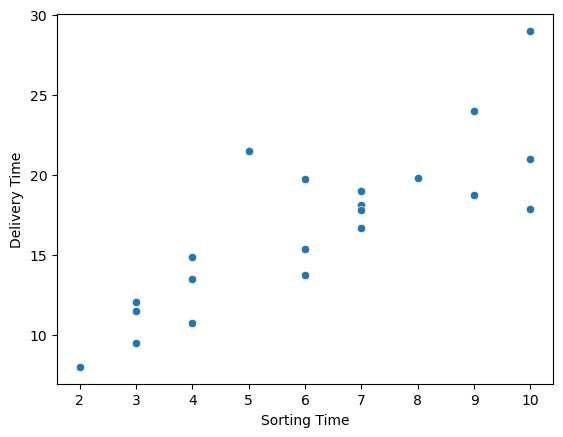

In [10]:
sns.scatterplot(x=del_tim['Sorting Time'],y=del_tim['Delivery Time'])
plt.show()

In [11]:
del_tim.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


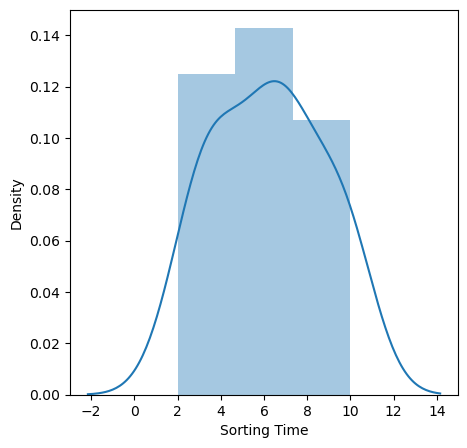

In [12]:
plt.figure(figsize=(5,5))
sns.distplot(del_tim['Sorting Time'])
plt.show()

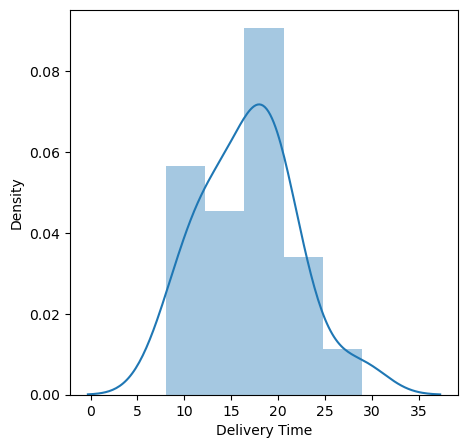

In [13]:
plt.figure(figsize=(5,5))
sns.distplot(del_tim['Delivery Time'])
plt.show()

## Both the Sorting time and Delivery time seem to have fairly normal Distribution so we can proceed with model building

In [14]:
df = del_tim.copy()
df.columns = ['DT','ST']
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [15]:
model = smf.ols('DT~ST',data=df).fit()

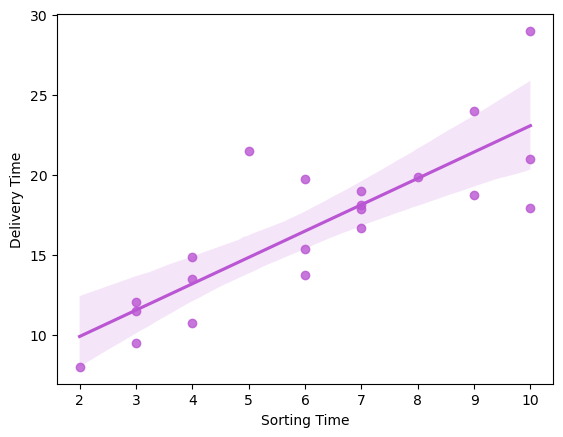

In [16]:
sns.regplot(x=del_tim['Sorting Time'],y=del_tim['Delivery Time'],data=df,color='mediumorchid')
plt.show()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        17:47:30   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Coefficients
print(model.params)

Intercept    6.582734
ST           1.649020
dtype: float64


In [19]:
print(model.tvalues)
print('\n\n')
print(model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64



Intercept    0.001147
ST           0.000004
dtype: float64


In [20]:
# R2 and adjusted R2 of the model 
print(f"R_squared = {model.rsquared},\nAdjusted R_squared = {model.rsquared_adj}")

R_squared = 0.6822714748417231,
Adjusted R_squared = 0.6655489208860244


## Predict new Data Point

In [21]:
new_data = pd.array([0,5,10],dtype=np.int64)
pred_data = pd.DataFrame(new_data,columns=['ST'])
pred_data

,ST
0,0
1,5
2,10


In [22]:
model.predict(pred_data)

0     6.582734
1    14.827833
2    23.072933
dtype: float64

In [23]:
model.mse_resid

8.613660132645544

In [24]:
# mean Delivery Time of Training Data is 16.79
# RMSE is
np.sqrt(model.mse_resid)

2.9349037688901394

+  RMSE -  2.93 for delivery time of training data = 16.79 
+ R2 of model is 68.2 % 

## Q2.Simple linear regression model for Salary Hike

In [25]:
sal_hik = pd.read_csv('Salary_Data.csv')

+ EDA for the data

In [26]:
sal_hik.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [27]:
print(sal_hik.shape)

(30, 2)


In [28]:
sal_hik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [29]:
sal_hik.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [30]:
sal_hik.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


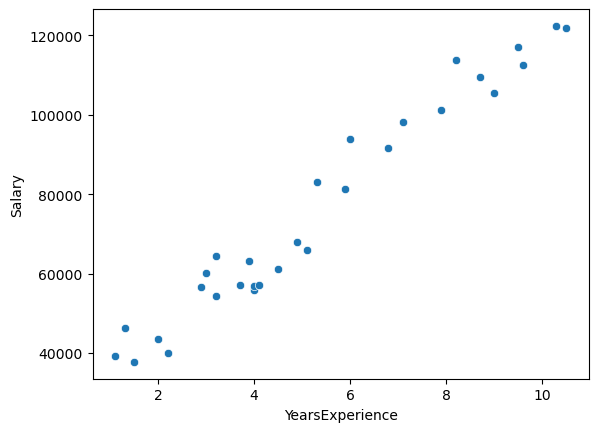

In [31]:
sns.scatterplot(x=sal_hik['YearsExperience'],y=sal_hik['Salary'])
plt.show()

## Strong Possitive correlation between 'Salary' and 'YearsExperience' can be observed 

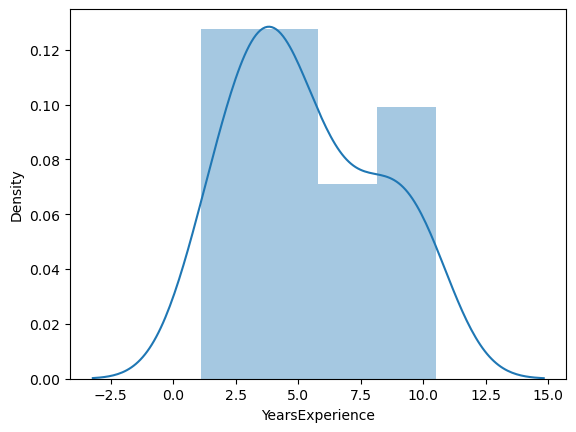

In [32]:
sns.distplot(sal_hik['YearsExperience'])
plt.show()

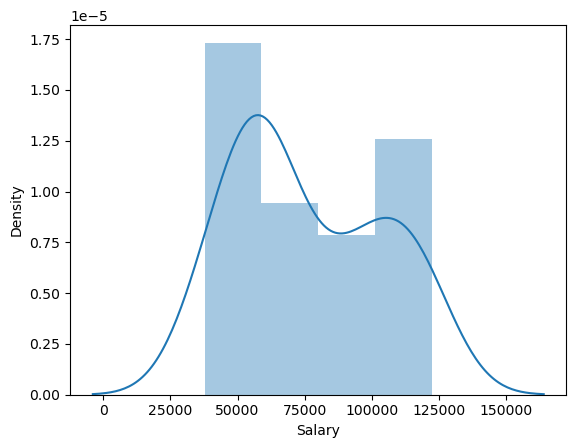

In [33]:
sns.distplot(sal_hik['Salary'])
plt.show()

## We proceed with building the model

In [34]:
df2 = sal_hik.copy()
df2.columns = ['Yrs','Sal']
df2.head(3)

,Yrs,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [35]:
model = smf.ols('Sal~Yrs',data=df2).fit()

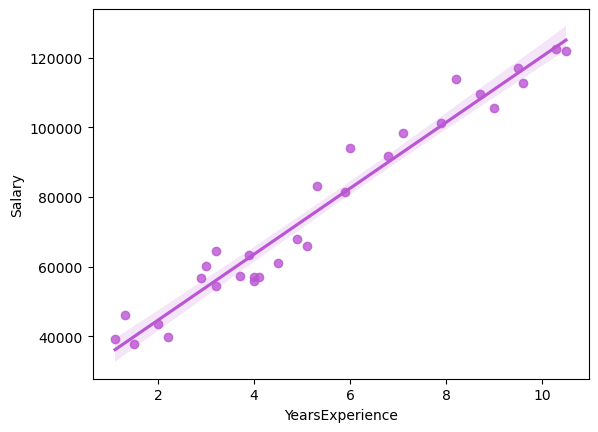

In [36]:
sns.regplot(data = sal_hik,x='YearsExperience',y='Salary',color='mediumorchid')
plt.show()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        17:47:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Yrs         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Coefficients
print(model.params)

Intercept    25792.200199
Yrs           9449.962321
dtype: float64


In [39]:
print(model.tvalues)
print('\n\n')
print(model.pvalues)

Intercept    11.346940
Yrs          24.950094
dtype: float64



Intercept    5.511950e-12
Yrs          1.143068e-20
dtype: float64


In [40]:
# R2 and adjusted R2 of the model 
print(f"R_squared = {model.rsquared},\nAdjusted R_squared = {model.rsquared_adj}")

R_squared = 0.9569566641435086,
Adjusted R_squared = 0.9554194021486339


In [41]:
print(model.mse_resid)

33504591.131015327


In [43]:
# mean Salary of Training Data is 76003
# RMSE is
print(np.sqrt(model.mse_resid))

5788.315051119395


+ RMSE = 5788.32 for mean salary = 76003.0 for training data
+ R2 for model = 95.7